# Behavioral Patterns

The behavioral patterns are guidelines suggested to create classes that allows to communicate objects to each other. The goal of the behavioral patterns is to make those interactions easier and more understandable.

The five creational patterns available are:
1. Chain of Responsability
2. Command
3. Iterator
4. Mediator
5. Memento
6. Observer
7. State
8. Strategy
9. Template method
10. Visitor

Again, we are going to be convering eaach of the possible patterns and making some examples in the context of machine learning engineering.

# Chain of Responsability

**What is a chain of responsability?**

This is a design pattern that through recursion allows to orchestrates objects that are focused on an specific tasks. The object contains an attribute that saves which is the following object, and a `handler` function which defines the function execution.

**When should we use it?**

When you need to perform differen actions over an object. Those actions might change and each one should be independent to be able to modify in the future. 

**Analogy**

If you're moving a long volume of water, you have no water pumps, but you have many people who can help you and many buckets. Any idea? You can create a chain where each person moves just a bucket for some meters. The chain formed allows to perform the entire process sequentially. Here each person does not know what all people is doing, each person only knows what is their responsability. Nothing else!

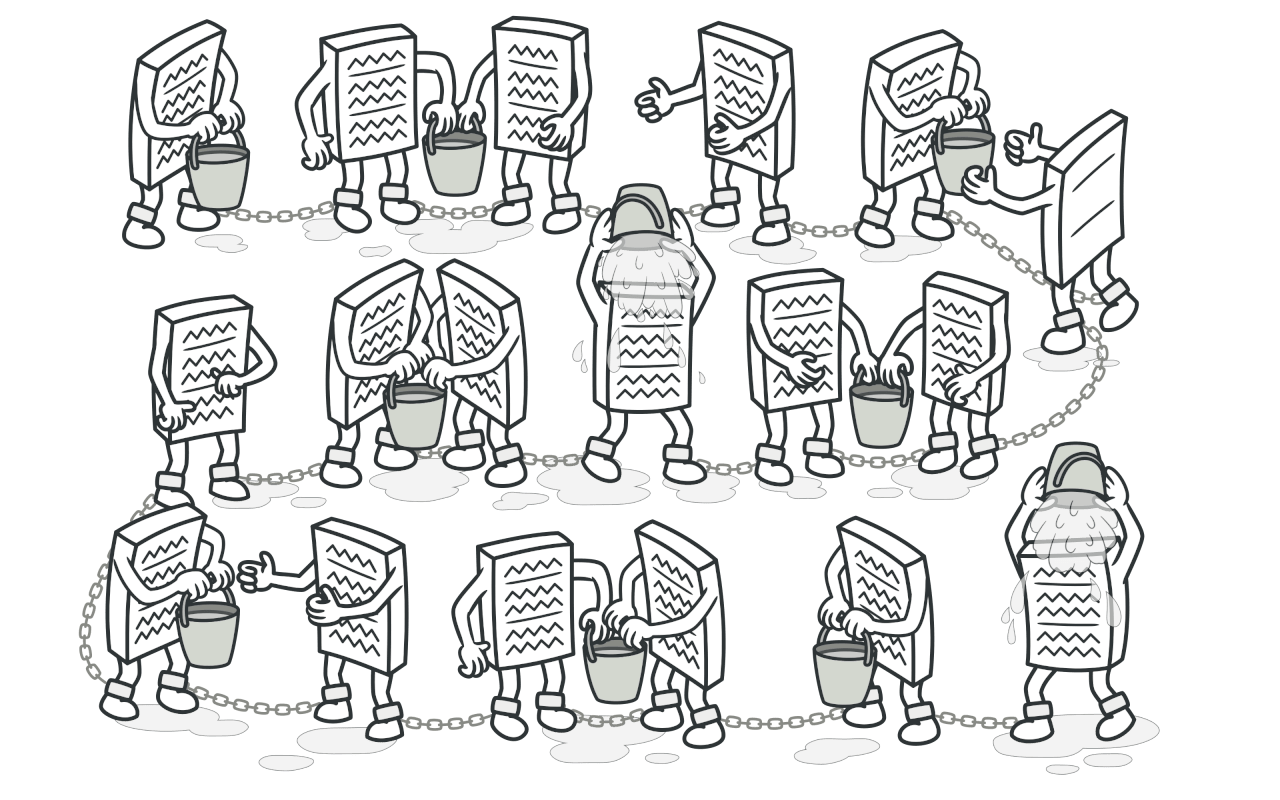

Reference: https://refactoring.guru/design-patterns/chain-of-responsibility

**Scenario**

You have developed a machine learning learning model for credit scoring. However the backend and frotend do not perform any data validation. You need to double check before making any kind of prediction; otherwise, it is likely to do cause issues during model execution and giving to the use wrong data.

Please, create an strong data validation which can deal with the following scenarios:

1. No missing values
2. No strings
3. Only ints for age
4. Only floats for salary
5. The age should be higher than 18 years old

The input contains the following fiels as a dict:
```json
{
    "age": 21,
    "salary": 1500,
    "house_owner": True,
}
```

## Antipattern

The most easiest way to create an antipattern is to create a unique class which performs the data validation. If fact, this might seem that is the simplest solution and the `chain of responsability` overcomplicates the solution.

**Disclaimer:**

Well, until some point, the `chain of responsability` overcomplicates the code, but when adding too much information and code, is the best way to go. As engineers, we must know that there is no `silver bullet`, you have to choose the best solution for the best scenario,.

In [1]:
class CreditScoringValidation:
    def __init__(self):
        pass

    def check_missing_values(self, dict) -> None:
        for key, value in dict.items():
            if value is None:
                raise ValueError(f"The value for '{key}' is missing.")

    def check_age_requirement(self, age: int) -> None:
        if age < 18:
            raise ValueError("Age must be at least 18.")

    def check_ints_for_age(self, age) -> None:
        if not isinstance(age, int):
            raise TypeError("Age must be an integer.")

    def check_floats_for_income(self, income) -> None:
        if not isinstance(income, (int, float)):
            raise TypeError("Income must be a number.")

    def validate(self, data):
        self.check_missing_values(data)
        self.check_ints_for_age(data["age"])
        self.check_age_requirement(data["age"])
        self.check_floats_for_income(data["income"])

Create a dummy dictionary to test the results

In [2]:
dummy_data = {"age": 25, "income": 50000.0, "house_owner": False}

In [3]:
data_validator = CreditScoringValidation()

In [4]:
data_validator.validate(dummy_data)

What happens if I give data that does not follows the rules

In [5]:
wrong_data = {"age": 12, "income": 50000.0, "house_owner": False}

In [6]:
data_validator.validate(wrong_data)

ValueError: Age must be at least 18.

As you saw, this is working, but if we want to add and additional validation or changing the order of the validation operations, we are breaking the open-closed principle.

**How to solve this antipattern?**

We can avoid this by creating a `chain of responsability`. 

1. We create a mother class that has body and the main functionalities of the child classes. And more important, we add here the `handle` method.

2. We create all the classes needed to created the chain.

3. We create the object and add the classes needed.

## Pattern

We started by creating the chain class

In [7]:
class ValidationChain:
    def __init__(self):
        self.next_object = None

    def add_next_object(self, obj):
        if not self.next_object:
            self.next_object = obj
        else:
            self.next_object.add_next_object(obj)

    def handle(self, request):
        if self.next_object:
            return self.next_object.handle(request)
        return None

We continue creating the validator for null values

In [8]:
class NullValidator(ValidationChain):
    def handle(self, request):
        for key, value in request.items():
            if value is None:
                raise ValueError(f"The value for '{key}' is missing.")
        return super().handle(request)

We create the validator for the age

In [9]:
class AgeValidator(ValidationChain):
    def handle(self, request):
        age = request.get("age")
        if age < 18:
            raise ValueError("Age must be at least 18.")
        return super().handle(request)

We create the validator for the ints in the age

In [10]:
class IntAgeValidator(ValidationChain):
    def handle(self, request):
        age = request.get("age")
        if not isinstance(age, int):
            raise TypeError("Age must be an integer.")
        return super().handle(request)

We create the float validator for the income

In [11]:
class FloatIncomeValidator(ValidationChain):
    def handle(self, request):
        income = request.get("income")
        if not isinstance(income, (int, float)):
            raise TypeError("Income must be a number.")
        return super().handle(request)

Now, we have all classes we need. Let's star by creating the chain.

In [13]:
data_validator_chain = ValidationChain()
data_validator_chain.add_next_object(NullValidator())
data_validator_chain.add_next_object(AgeValidator())
data_validator_chain.add_next_object(IntAgeValidator())
data_validator_chain.add_next_object(FloatIncomeValidator())

As you saw before, we added the validations desired, we can modify the order without touching the original class, it just depend on how we define the chain. For now, let's keep the same order and validate the dummy and wrong data.

In [14]:
data_validator_chain.handle(dummy_data)

In [15]:
data_validator_chain.handle(wrong_data)

ValueError: Age must be at least 18.

Now, let's going to define a second chain and modify the order of this to see if we get a different result

In [17]:
data_validator_chain = ValidationChain()
data_validator_chain.add_next_object(FloatIncomeValidator())
data_validator_chain.add_next_object(NullValidator())
data_validator_chain.add_next_object(IntAgeValidator())
data_validator_chain.add_next_object(AgeValidator())

In [18]:
data_validator_chain.handle(dummy_data)

In [19]:
data_validator_chain.handle(wrong_data)

ValueError: Age must be at least 18.

Again we get the same error, so our chain is working properly.

To sum up, this design pattern let's to define objects that need to communicate each other in sequential steps. Those steps can be modified without touching the original classes.